In [1]:
import cv2 as cv
import pyzbar
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from pyzbar.pyzbar import decode

In [3]:
def dec(img):
    gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    barcode=decode(gray)
    for obj in barcode:
        p=obj.polygon
        (x,y,w,h)=obj.rect
        pts=np.array(p,np.int32)
        pts=pts.reshape((-1,1,2))
        cv.polylines(img,[pts],True,(0,255,0),3)
        bc_Data = obj.data.decode("utf-8")
        bc_Type = obj.type
        stri="Data: "+str(bc_Data)+" | Type: "+str(bc_Type)
        cv.putText(frame,stri,(x,y),cv.FONT_HERSHEY_SIMPLEX,0.8,(0,0,255), 2)
        print("Barcode: "+bc_Data +" | Type: "+bc_Type)

In [ ]:
cap=cv.VideoCapture(0)
while True:
    ret,frame=cap.read()
    dec(frame)
    if cv.waitKey(1000) & 0xFF==ord('q'):
            break
cap.release()
cv.destroyAllWindows()

Barcode: upi://pay?pa=8279960162@paytm&pn=PaytmUser&mc=0000&mode=02&purpose=00&orgid=159761&cust=1283647681 | Type: QRCODE
Barcode: upi://pay?pa=8279960162@paytm&pn=PaytmUser&mc=0000&mode=02&purpose=00&orgid=159761&cust=1283647681 | Type: QRCODE
Barcode: upi://pay?pa=8279960162@paytm&pn=PaytmUser&mc=0000&mode=02&purpose=00&orgid=159761&cust=1283647681 | Type: QRCODE
Barcode: upi://pay?pa=8279960162@paytm&pn=PaytmUser&mc=0000&mode=02&purpose=00&orgid=159761&cust=1283647681 | Type: QRCODE
Barcode: upi://pay?pa=8279960162@paytm&pn=PaytmUser&mc=0000&mode=02&purpose=00&orgid=159761&cust=1283647681 | Type: QRCODE


In [4]:
import requests
from io import BytesIO

In [5]:
def url_img(url):
    try:
        response=requests.get(url)
        if response.status_code==200:
            image_data=BytesIO(response.content)
            im_array=np.asarray(bytearray(image_data.read()),dtype=np.uint8)
            image=cv.imdecode(im_array,cv.IMREAD_COLOR)
            return image
        else:
            print("Failed to retrieve image from URL. Status code:", response.status_code)
            return None
    except Exception as e:
        print("An error occurred:", e)
        return None

In [6]:
def dec2(img):
    gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    barcode=decode(gray)
    for obj in barcode:
        p=obj.polygon
        (x,y,w,h)=obj.rect
        pts=np.array(p,np.int32)
        pts=pts.reshape((-1,1,2))
        cv.polylines(img,[pts],True,(0,255,0),3)
        bc_Data = obj.data.decode("utf-8")
        bc_Type = obj.type
        stri="Data: "+str(bc_Data)+" | Type: "+str(bc_Type)
        cv.putText(img,stri,(x,y),cv.FONT_HERSHEY_SIMPLEX,0.8,(0,0,255), 2)
        print("Barcode: "+bc_Data +" | Type: "+bc_Type)

In [7]:
image=url_img('https://www.lifewire.com/thmb/0HbAqs5abtRaJkUm8xg3KABGzdc=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/qr-barcode-for-data-labeling-1257966228-0dcfa9a3fbad4721aa5717bf13953adf.jpg')

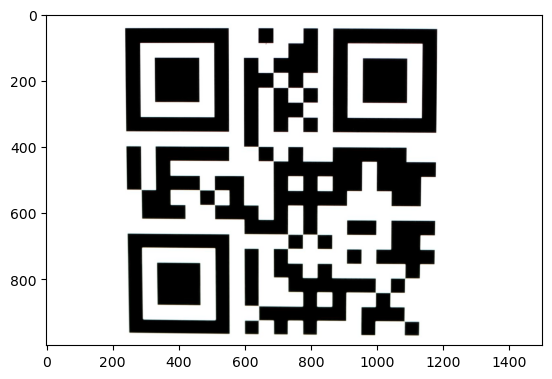

In [8]:
plt.imshow(image)

In [9]:
dec2(image)

Barcode: qu code | Type: QRCODE
